In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
import pytz

In [11]:
# DATA PATH
TRAIN_DATA_PATH = os.path.join("..","datasets","processed","train.csv")
TEST_DATA_PATH = os.path.join("..","datasets","processed","test.csv")

In [12]:
train = pd.read_csv(TRAIN_DATA_PATH, parse_dates=['Month'], index_col='Month', squeeze=True)
test = pd.read_csv(TEST_DATA_PATH, parse_dates=['Month'], index_col='Month', squeeze=True)

In [13]:
# Seasonal ARIMA Model
# ===================================================================
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=902.221, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=905.065, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=900.823, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=901.721, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=899.902, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=901.052, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=901.337, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=900.971, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=900.685, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=902.967, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=901.457, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.214 seconds
                                     SARIMAX Results                                      


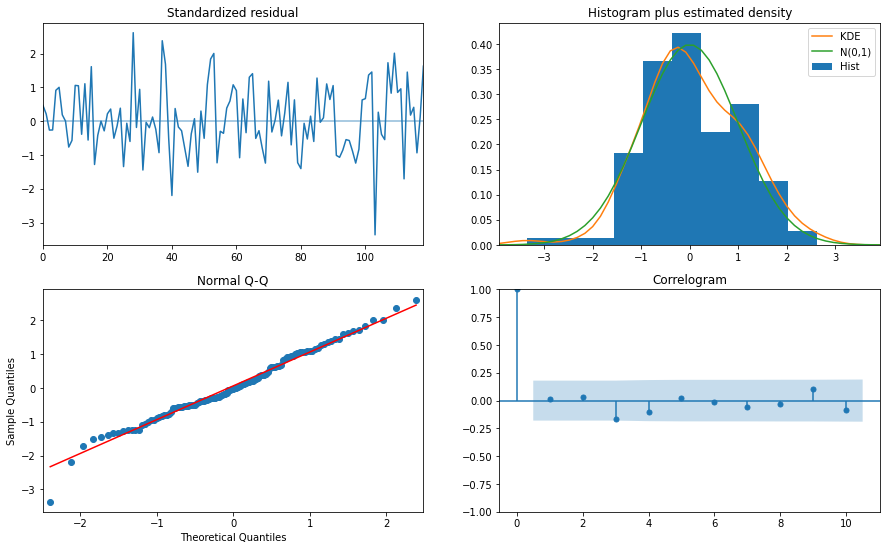

In [14]:
# Seasonal ARIMA Model Diagnostic
smodel.plot_diagnostics(figsize=(15,9))
plt.show()

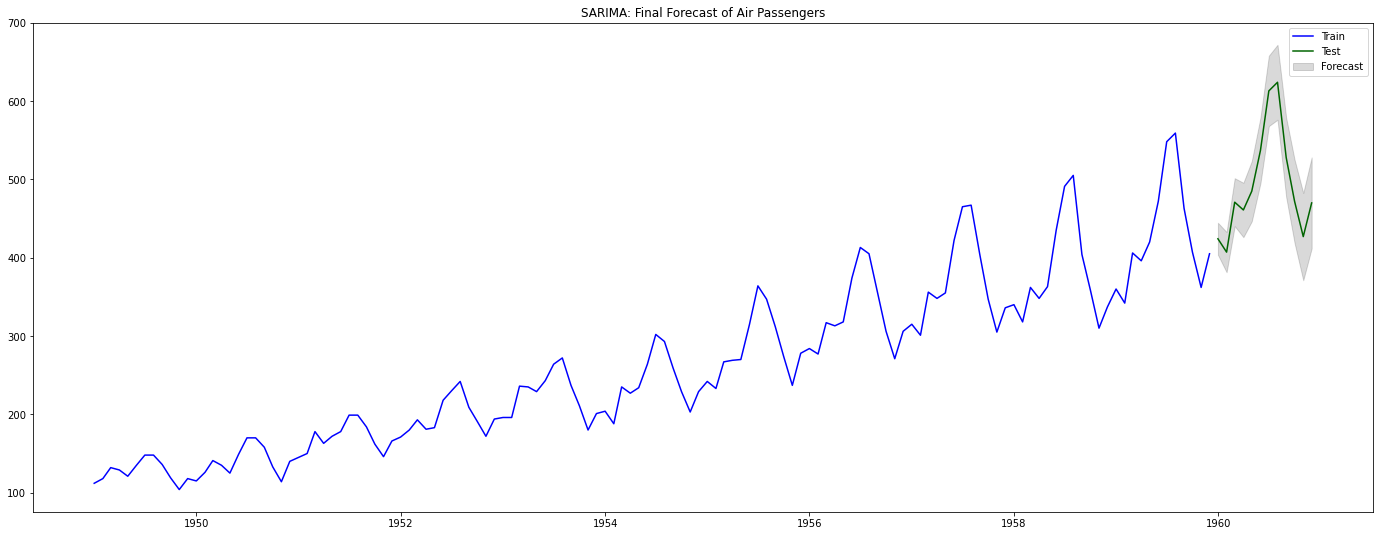

In [15]:
# Seasonal ARIMA Forecast
n_periods = 12
smodel_forecast, smodel_confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods=n_periods, freq='M')

# make series for plotting purpose
forecast_series = pd.Series(smodel_forecast, index=index_of_fc)
lower_series = pd.Series(smodel_confint[:, 0], index=index_of_fc)
upper_series = pd.Series(smodel_confint[:, 1], index=index_of_fc)

# Plot
fig, ax = plt.subplots(figsize=(24,9))
ax.plot(train, color="b")
#ax.plot(test, color="r")
ax.plot(forecast_series, color='darkgreen')
ax.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
ax.legend(["Train","Test","Forecast"])

plt.title("SARIMA: Final Forecast of Air Passengers")
#plt.savefig("sarima_forecast.jpg")
plt.show()

In [16]:
# Seasonal ARIMA Performance Metrics
%run ../auxiliar_functions/forecast_accuracy.py
sarima_performance = forecast_accuracy(test.values, smodel_forecast)
print("Seasonal ARIMA Performance:")
print("="*24)
for k, v in sarima_performance.items():
    print(k +" : "+ str(v))

Seasonal ARIMA Performance:
Scores : MAE      18.53
MSE     572.72
MAPE      0.04
RMSE     23.93
Name: Scores, dtype: float64


### Final Forecast

In [17]:
# Seasonal ARIMA Model
# ===================================================================
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

print(smodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=902.221, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=905.065, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=900.823, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=901.721, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=899.902, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=901.052, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=901.337, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=900.971, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=900.685, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=902.967, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=901.457, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.222 seconds
                                     SARIMAX Results                                      


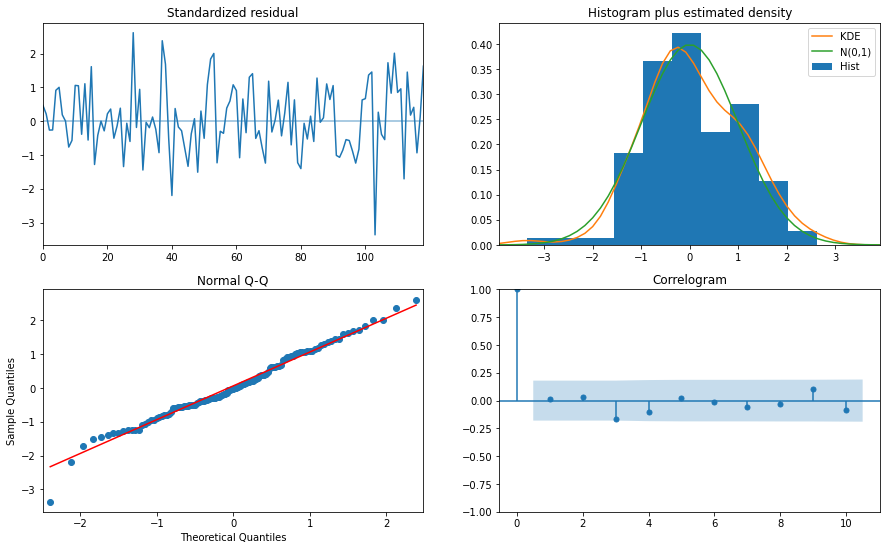

In [18]:
# Final Seasonal ARIMA Model Diagnostic
smodel.plot_diagnostics(figsize=(15,9))
plt.show()

In [20]:
# Seasonal ARIMA Forecast
n_periods = 12
final_smodel_forecast, final_smodel_confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods=n_periods, freq='MS')

# make series for plotting purpose
final_forecast_series = pd.Series(final_smodel_forecast, index=index_of_fc)
lower_series = pd.Series(final_smodel_confint[:, 0], index=index_of_fc)
upper_series = pd.Series(final_smodel_confint[:, 1], index=index_of_fc)

# Plot
fig, ax = plt.subplots(figsize=(24,9))
ax.plot(air.Air, color="b")
ax.plot(final_forecast_series, color='darkgreen')
ax.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
ax.legend(["Actual","Forecast"])

plt.title("SARIMA: Final Forecast of Air Passengers")
#plt.savefig("final_sarima_forecast.jpg")
plt.show()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

In [ ]:
# Metric Performance
# ===========================================================

MAPE(final_smodel_forecast, test.values).round(3)

In [ ]:
final_forecast_series